In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def read_data(file):
    df = pd.read_csv(file).rename(columns=lambda x: x.strip())
    results = df.groupby(['iters', 'train_size', 'test_size'], as_index=False).agg({'pval':['mean','std'], 'time':['mean', 'std']})
    results.columns = ['iters', 'train_size', 'test_size',
                       'pval_mean', 'pval_std', 'time_mean', 'time_std']
    return results

In [117]:
files = ['../results/cliff_results_a129_27-07-2023_11:36:31.csv',
         '../results/cliff_results_a211_28-07-2023_16:36:57.csv',
         '../results/cliff_results_a220_29-07-2023_09:27:19.csv',
         '../results/cliff_results_a284_30-07-2023_12:39:59.csv']
dfs = [read_data(f) for f in files]

# Varying Iterations

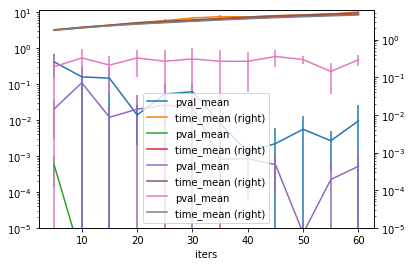

In [118]:
def plot_iters(results, ax):
    iters_df = results[(results['train_size'] == 256) & (results['test_size'] == 512)]
    plt.yscale('log')
    plt.ylim((1e-5, None))
    iters_df.plot(ax=ax, x='iters', y='pval_mean', yerr='pval_std')
    iters_df.plot(ax=ax, x='iters', y='time_mean', yerr='time_std', secondary_y=True);

fig, ax = plt.subplots()
[plot_iters(df, ax) for df in dfs];

# Varying Train Data

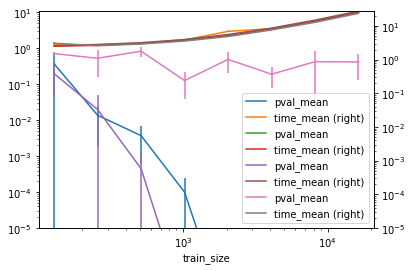

In [119]:
def plot_train(results, ax):
    iters_df = results[(results['iters'] == 20) & (results['test_size'] == 512)]
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim((1e-5, None))

    iters_df.plot(ax=ax, x='train_size', y='pval_mean', yerr='pval_std')
    iters_df.plot(ax=ax, x='train_size', y='time_mean', yerr='time_std', secondary_y=True);

fig, ax = plt.subplots()
[plot_train(df, ax) for df in dfs];

# Varying Test Data

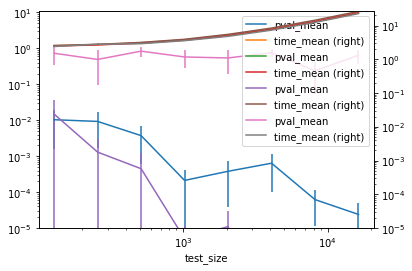

In [122]:
def plot_test(results, ax):
    iters_df = results[(results['iters'] == 20) & (results['train_size'] == 512)]
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim((1e-5, None))
    iters_df.plot(ax=ax, x='test_size', y='pval_mean', yerr='pval_std')
    iters_df.plot(ax=ax, x='test_size', y='time_mean', yerr='time_std', secondary_y=True);

fig, ax = plt.subplots()
[plot_test(df, ax) for df in dfs];

# Sorting by Pval and Time

In [123]:
results = pd.concat(dfs)

In [124]:
# Top-20 p-values
results.sort_values('pval_mean').head(20)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
767,60,16384,16384,1.879709e-194,0.000000e+00,139.735581,0.577029
766,60,16384,8192,5.959023e-186,0.000000e+00,105.695233,0.562816
765,60,16384,4096,1.563855e-176,0.000000e+00,88.640815,0.424273
703,55,16384,16384,1.276047e-173,0.000000e+00,128.490270,0.899301
702,55,16384,8192,2.020935e-160,3.500404e-160,96.790959,0.361931
701,55,16384,4096,1.348027e-159,1.121249e-159,80.893498,0.266822
638,50,16384,8192,2.489046e-156,4.309349e-156,88.220903,0.573968
639,50,16384,16384,1.104415e-155,1.912878e-155,116.913507,0.083470
764,60,16384,2048,1.605936e-154,2.781563e-154,79.871151,0.285364
767,60,16384,16384,2.253979e-149,3.903403e-149,139.570037,0.506878


In [125]:
# Top-100 p-values, sorted by running time
results.sort_values('pval_mean').head(100).sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
740,60,2048,2048,9.077464e-96,1.572006e-95,18.311163,0.088501
733,60,1024,4096,3.126086e-99,4.767217e-99,22.184943,0.200941
677,55,2048,4096,7.057669e-97,1.222384e-96,24.322785,0.160105
684,55,4096,2048,7.654812e-93,1.301196e-92,24.864751,0.165261
741,60,2048,4096,2.521005e-106,4.358011e-106,26.499058,0.044757
748,60,4096,2048,1.108508e-99,1.616678e-99,27.182851,0.456970
685,55,4096,4096,1.238173e-105,1.266666e-105,32.309672,0.095621
606,50,1024,8192,4.777247e-98,8.213132e-98,32.445697,0.164053
749,60,4096,4096,1.638027e-106,2.837146e-106,35.248132,0.149458
670,55,1024,8192,2.706008e-104,4.686942e-104,35.355623,0.095890


In [126]:
# Fastest 10 results that achieve p < 10^-5
results[results['pval_mean'] < 1e-5].sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
73,10,256,256,2.724649e-06,2.953428e-06,1.899983,0.007884
136,15,256,128,5.127231e-06,5.302727e-06,1.935312,0.019777
256,25,128,128,1.580013e-06,2.689633e-06,2.013712,0.023596
74,10,256,512,1.371615e-06,1.259899e-06,2.062314,0.004806
137,15,256,256,9.291319e-09,8.371791e-09,2.070885,0.016630
81,10,512,256,5.235746e-06,7.978700e-06,2.083084,0.016106
26,5,1024,512,9.173423e-06,4.631935e-06,2.095363,0.014767
200,20,256,128,2.220781e-07,3.828068e-07,2.095537,0.007652
193,20,128,256,1.387319e-06,2.078784e-06,2.102231,0.008122
320,30,128,128,6.535840e-06,5.774347e-06,2.152824,0.024366


# Scatter Plot of P-value vs Running Time

In [130]:
def scatterplot(c_col, xlim=None, ylim=None, log_scale=True):
    results.plot.scatter(x='pval_mean', y='time_mean', c=c_col, s=1, sharex=False)
    if log_scale:
        plt.xscale('log')
        #plt.yscale('log')
    plt.xlim((xlim, 1))
    plt.ylim((None, ylim))
    plt.xlabel('p-value')
    plt.ylabel('running time (s)')
    plt.show()

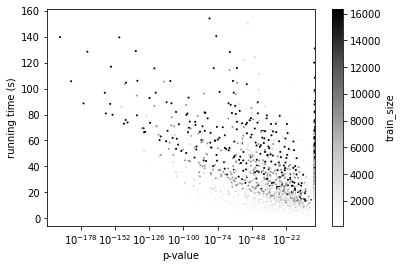

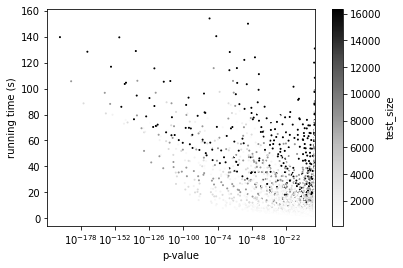

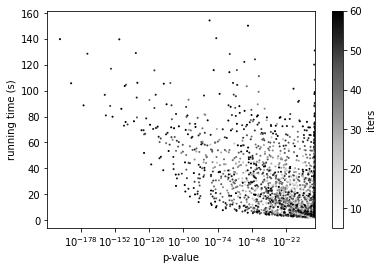

In [131]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col)

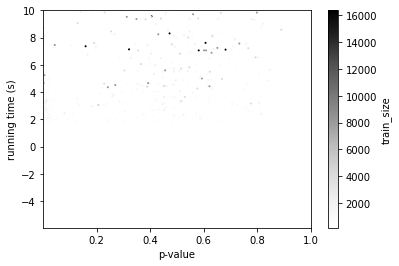

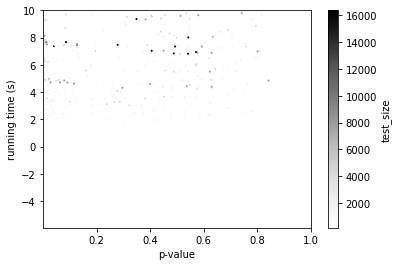

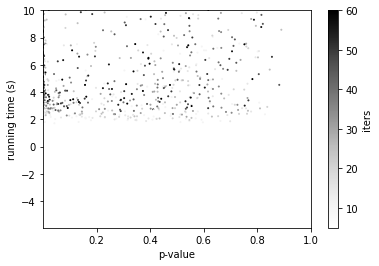

In [132]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col, 1e-5, 10, log_scale=False)